In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(32, 3, padding='same', kernel_regularizer=regularizers.L2(0.05))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(64, 3, padding='same', kernel_regularizer=regularizers.L2(0.05))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Conv2D(128, 3, padding='same', kernel_regularizer=regularizers.L2(0.05))(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496 

In [9]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

r = model.fit(
    X_train, y_train,
    batch_size = 32,
    epochs = 30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
1563/1563 [==============================] - 20s 7ms/step - loss: 1.9607 - accuracy: 0.4896 - val_loss: 1.7895 - val_accuracy: 0.4714
Epoch 2/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4661 - accuracy: 0.5930 - val_loss: 1.9682 - val_accuracy: 0.4503
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3934 - accuracy: 0.6184 - val_loss: 1.7449 - val_accuracy: 0.4948
Epoch 4/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3330 - accuracy: 0.6367 - val_loss: 1.5056 - val_accuracy: 0.5809
Epoch 5/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2904 - accuracy: 0.6511 - val_loss: 1.4477 - val_accuracy: 0.5901
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2542 - accuracy: 0.6619 - val_loss: 1.7301 - val_accuracy: 0.5108
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2152 - accuracy: 0.6749 - val_loss: 3.1455 - val_accur

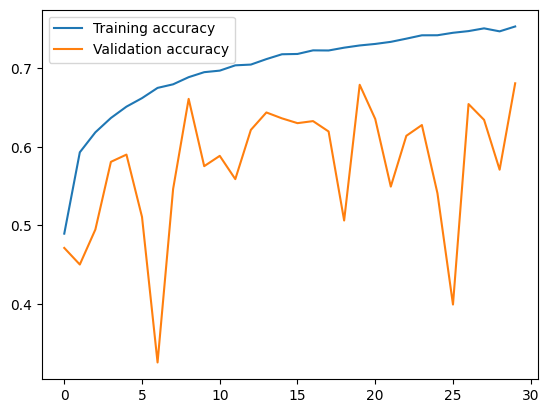

In [10]:
plt.plot(r.history['accuracy'], label='Training accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend();

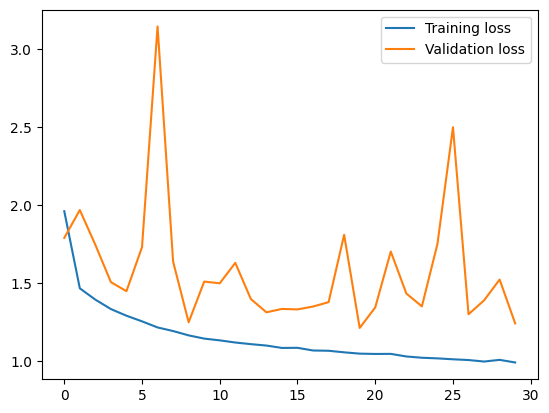

In [11]:
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend();